In [ ]:
# First, mount Google Drive and import required functions
from google.colab import drive
from tensorflow.keras.models import load_model  # This is the missing import
import os

# Mount Google Drive
drive.mount('/content/drive')

# Now load the model
model_path = '/content/drive/MyDrive/leaf-dataset/leaf_model.h5'

if os.path.exists(model_path):
    model = load_model(model_path)  # Now this will work
    print("Model loaded successfully!")
else:
    print(f"Error: Model file not found at {model_path}")
    print("Available files in directory:")
    !ls '/content/drive/MyDrive/leaf-dataset'
    print("\nYou need to first run the training code to create leaf_model.h5")

Mounted at /content/drive


Model loaded successfully!


In [ ]:
# Proper path format (note the quotes)
image_path = '/content/drive/MyDrive/leaf-dataset/disease/disease3.jpeg'

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# 2. Prediction function
def predict_leaf(image_path):
    """Returns 'HEALTHY' or 'DISEASED'"""
    try:
        img = cv2.imread(image_path)
        if img is None:
            return f"Error: Could not read image at {image_path}"

        img = cv2.resize(img, (64, 64))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        pred = model.predict(img)[0][0]
        return "HEALTHY" if pred < 0.5 else "DISEASED"

    except Exception as e:
        return f"Error: {str(e)}"

# 3. Example usage with your image
result = predict_leaf('/content/drive/MyDrive/leaf-dataset/disease/disease3.jpeg')
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
DISEASED


prediction with images


In [ ]:
from google.colab import drive
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



# 2. Load Model
model_path = '/content/drive/MyDrive/leaf-dataset/leaf_model.h5'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model not found at {model_path}")
model = load_model(model_path)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Improved Prediction Function
def predict_leaf(image_path):
    """Returns prediction and shows the image"""
    try:
        # Read image
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Could not read image at {image_path}")

        # Preprocess
        display_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        # Predict
        pred = model.predict(img)[0][0]
        label = "HEALTHY" if pred < 0.5 else "DISEASED"
        confidence = (1-pred)*100 if label=="HEALTHY" else pred*100

        # Display
        plt.imshow(display_img)
        plt.title(f"{label} ({confidence:.1f}%)", color='green' if label=="HEALTHY" else 'red')
        plt.axis('off')
        plt.show()

        return label, confidence

    except Exception as e:
        print(f"Error: {str(e)}")
        return None, 0



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


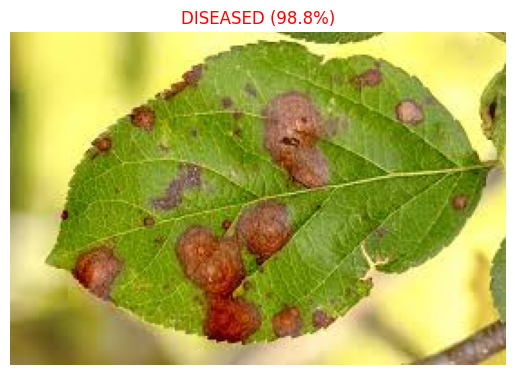

Result: DISEASED (98.8% confidence)


In [ ]:
# 4. Example Usage - VERIFY THIS PATH!
test_image = '/content/drive/MyDrive/leaf-dataset/disease/disease3.jpeg'
if not os.path.exists(test_image):
    print(f"Error: Test image not found at {test_image}")
    print("Available files:")
    !ls '/content/drive/MyDrive/leaf-dataset/healthy'
else:
    label, confidence = predict_leaf(test_image)
    print(f"Result: {label} ({confidence:.1f}% confidence)")